<a href="https://colab.research.google.com/github/elimelt/python-scripts/blob/main/cool-algorithms/divide_and_conquer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random
import matplotlib.pyplot as plt

def random_points(n, low, high):
  ans = []
  for _ in range(n):
    l = random.uniform(low, high)
    r = random.uniform(low, high)
    ans.append((l, r))
  return ans


def show(points, red_points=None):
    x, y = zip(*points)
    plt.scatter(x, y, color='b', label='data')

    if red_points:
        red_x, red_y = zip(*red_points)
        plt.scatter(red_x, red_y, color='r', label='closest')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

closest points: ((6122.908161510207, 791.5690430668054), (6118.22362898219, 787.1921072429477))


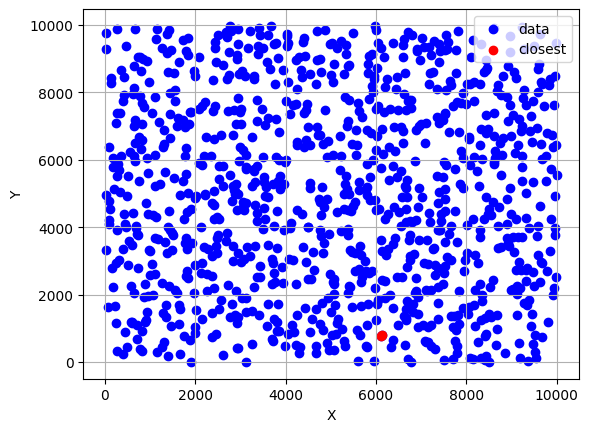

In [6]:
# divide and conquer closest points

def bounding_indices(P, low, high, key = lambda x: x):
    n = len(P)
    l, r = 0, n - 1

    while l <= r:
        mid = (l + r) // 2
        if low <= key(P[mid]):
            r = mid - 1
        else:
            l = mid + 1
    smallest_index = l

    l, r = 0, n - 1
    while l <= r:
        mid = (l + r) // 2
        if high >= key(P[mid]):
            l = mid + 1
        else:
            r = mid - 1
    highest_index = r

    return smallest_index, highest_index

def d(p1, p2):
  if p1 is None or p2 is None:
    return float('inf')
  return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** .5

def cp_brute_force(P):
  n = len(P)
  ans = P[:2]
  min_d = d(P[0], P[1])
  for i in range(n):
    for j in range(i + 1):
      if i == j:
        continue
      curr_d = d(P[i], P[j])
      if curr_d < min_d:
        min_d = curr_d
        ans = [P[i], P[j]]
  return ans

def cp_recursive(P):
  n = len(P)
  if n < 2:
    return None, None

  if n <= 10:
    return cp_brute_force(P)

  l1, l2 = cp_recursive(P[:n//2])
  r1, r2 = cp_recursive(P[n//2:])

  m1, m2 = (l1, l2) if d(l1, l2) < d(r1, r2) else (r1, r2)

  delta = d(m1, m2)
  L = (P[n//2][0] + P[n//2 + 1][0]) / 2

  l, h = bounding_indices(P, L - delta, L + delta, key = lambda x: x[0])

  middle = sorted(P[l:h + 1], key=lambda x: x[1])
  k = len(middle)
  for i in range(k):
    low = max(0, i - 11)
    high = min(k, i + 11)
    for j in range(low, high):
      if i == j:
        continue
      curr_dist = d(middle[i], middle[j])
      if curr_dist  < delta:
        delta = curr_dist
        m1, m2 = middle[i], middle[j]

  return m1, m2

def closest_points(P):
  return cp_recursive(sorted(P, key = lambda x: x[0]))

P = random_points(1000, 0, 10000)
c = closest_points(P)

print(f'closest points: {c}')
show(P, c)




In [7]:
def bounding_indices(P, low, high, key = lambda x: x):
    n = len(P)
    l, r = 0, n - 1

    while l <= r:
        mid = (l + r) // 2
        if low <= key(P[mid]):
            r = mid - 1
        else:
            l = mid + 1
    smallest_index = l

    l, r = 0, n - 1
    while l <= r:
        mid = (l + r) // 2
        if high >= key(P[mid]):
            l = mid + 1
        else:
            r = mid - 1
    highest_index = r

    return smallest_index, highest_index

def cis_bruteforce(A, I, l, u, low, high):
  ans = 0
  for i in range(low, high):
    for j in range(i, high):
      s = I(i, j)
      if s <= u and s >= l:
        ans += 1
  return ans

def cis_recursive(A, I, l, u, low, high):
  if high - low <= 2:
    return cis_bruteforce(A, I, l, u, low, high)

  mid = low + (high - low)//2
  left = cis_recursive(A, I, l, u, low, mid)
  right = cis_recursive(A, I, l, u, mid, high)

  total_sum = sum(A[low:high])
  left_sum = sum(A[low:mid])
  right_sum = total_sum - left_sum

  prefix = [0] * (high - low + 1)
  suffix = [0] * (high - low + 1)
  pre = 0
  for i in range(high - low):
    prefix[i] = pre
    pre += A[low + i]
    suffix[i] = total_sum - pre

  prefix[-1] = total_sum
  mid = (high - low)//2

  possible_left_halfs = sorted(
      [left_sum - p for p in prefix[:mid]]
  )

  cross = 0

  for i in range(mid, len(prefix) - 1):
    right_half = right_sum - suffix[i]

    min_left_half = l - right_half
    max_left_half = u - right_half

    j, k = bounding_indices(possible_left_halfs, min_left_half, max_left_half)

    cross += k - j + 1

  return left + right + cross


def count_interval_sums(A, l, u):
  n = len(A)
  prefix, suffix = [0] * (n+1), [0] * (n+1)
  pre = 0
  total = sum(A)
  for i in range(n):
    prefix[i] = pre
    pre += A[i]
    suffix[i] = total - pre

  def I(i, j):
    return total - prefix[i] - suffix[j]

  return cis_recursive(A, I, l, u, 0, len(A))

A = [1, 1, 1, 0, 1, 1]
l, u = 1, 3

count_interval_sums(A, l, u)


17

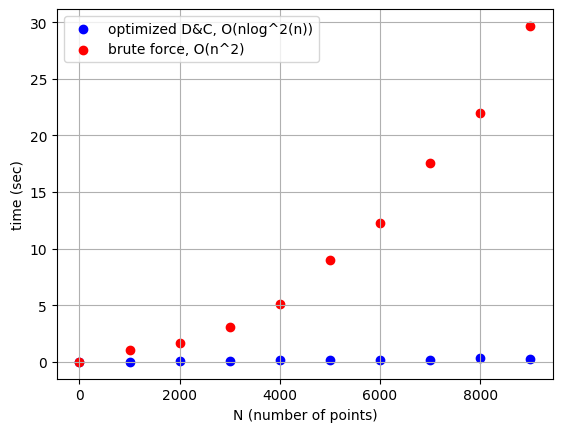

In [8]:
import time

def graph(points1, points2=None):
    x, y = zip(*points1)
    plt.scatter(x, y, color='b', label='optimized D&C, O(nlog^2(n))')

    if points2:
        red_x, red_y = zip(*points2)
        plt.scatter(red_x, red_y, color='r', label='brute force, O(n^2)')

    plt.xlabel('N (number of points)')
    plt.ylabel('time (sec)')
    plt.legend()
    plt.grid(True)
    plt.show()


def benchmark(N):
  d_and_c = []
  brute_force = []
  for n in range(2, N, N//10):
    P = random_points(n, 0, n)
    start_time = time.time()
    r = closest_points(P)
    end_time = time.time()
    d_and_c.append((n, end_time - start_time))

    start_time = time.time()
    r = cp_brute_force(P)
    end_time = time.time()
    brute_force.append((n, end_time - start_time))

  graph(d_and_c, brute_force)


benchmark(10000)

